In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header= None)
df_train.shape

(60000, 785)

In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header= None)
df_test.shape

(10000, 785)

In [4]:
28*28 

784

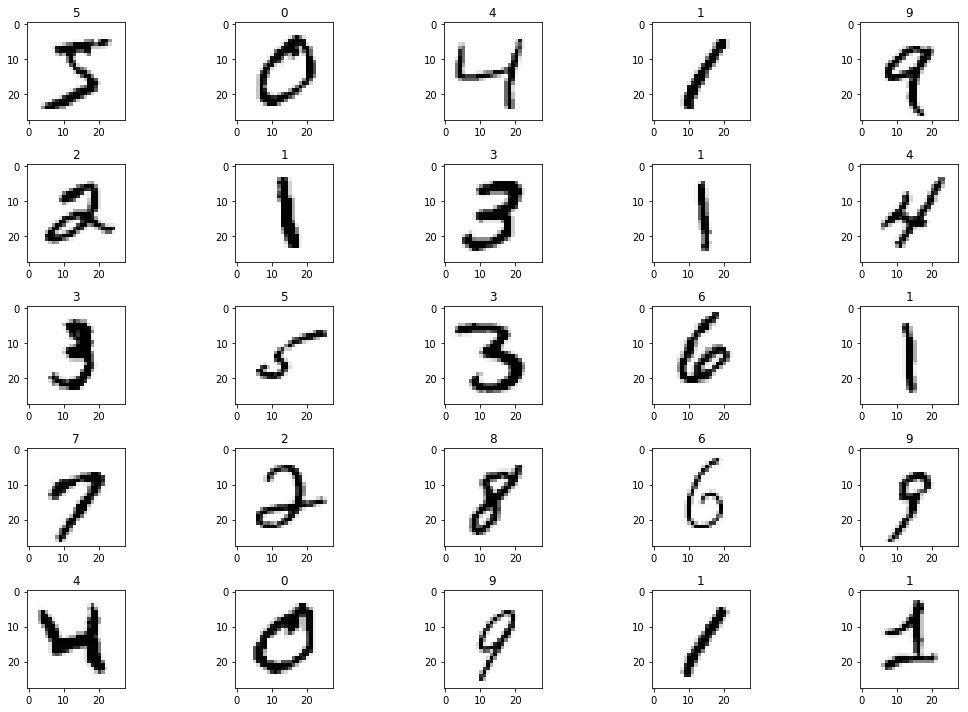

In [5]:
fig, axes = plt.subplots(5, 5, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(df_train.iloc[i, 1:].values.reshape(28, -1), cmap="Greys")
    ax.set_title(df_train.iloc[i, 0])

plt.tight_layout()

In [6]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]


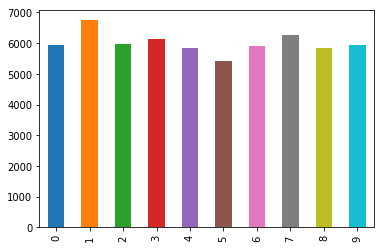

In [7]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

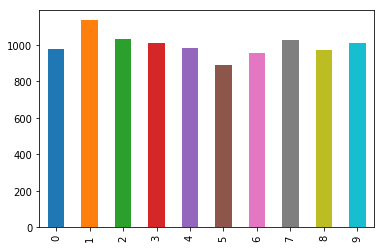

In [8]:
pd.Series(y_test).value_counts().sort_index().plot.bar()

In [12]:
from sklearn import preprocessing
import numpy as np

In [13]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train.astype(np.float64))
X_test_std = scaler.transform(X_test.astype(np.float64))

In [47]:
%%time
est = linear_model.LogisticRegression(C = 1.0)
est.fit(X_train_std, y_train)
print("accuracy", est.score(X_test_std, y_test), "iterations:", est.n_iter_)

accuracy 0.9171 iterations: [14]
CPU times: user 11min 46s, sys: 1.73 s, total: 11min 48s
Wall time: 11min 49s


In [44]:
import scipy

In [84]:
inits = np.random.randn(10, 784) 
inits = inits / np.std(inits, axis=1).reshape(10, -1)

In [88]:
%%time
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train_std, y_train, inits)
print("accuracy", est.score(X_test_std, y_test), "iterations:", est.n_iter_)

accuracy 0.9164 iterations: 14
CPU times: user 9.6 s, sys: 168 ms, total: 9.77 s
Wall time: 3.09 s


In [63]:
import seaborn as sns

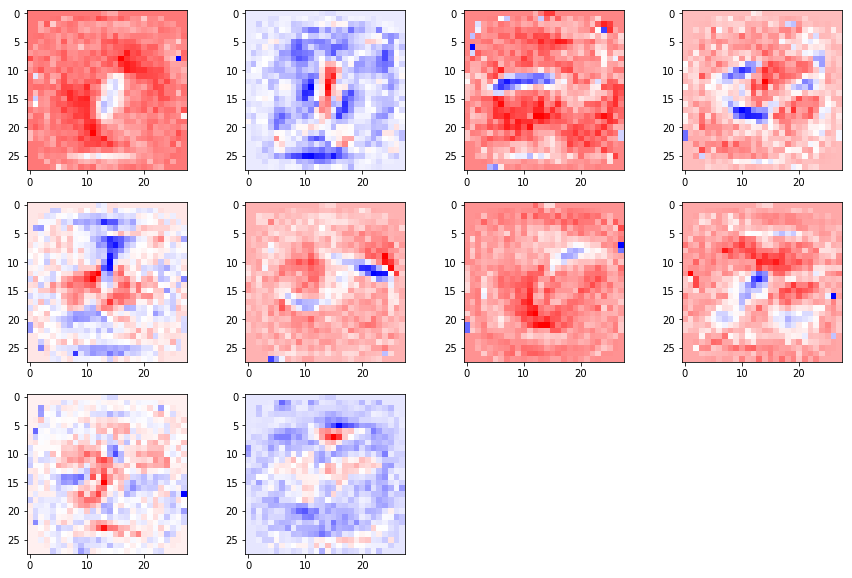

In [68]:
fig, _ = plt.subplots(3, 4, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    if i < est.coef_.shape[0]:
        ax.imshow(est.coef_[i, :].reshape(28, 28), cmap = "bwr", interpolation="nearest")
    else:
        ax.remove()